In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Useful functions
---

In [2]:
def display_svg(data):
    from IPython.display import SVG, display
    display(SVG(data))

In [3]:
def export_svg(data, filename):
    f = open(f'{filename}.svg', "w")
    f.write(data)
    f.close()

# Build SVG
---

In [4]:
WIDTH = 360
HEIGHT = 480

In [5]:
SVG = '<?xml version="1.0" encoding="utf-8"?>\n'
SVG += '<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n'

In [6]:
SVG += f'<svg id="image" width="{WIDTH}px" height="{HEIGHT}px" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">'

## Falling stars 01
---

In [7]:
SVG += '''

  <defs>
    <!-- ! Gradients -->
    <linearGradient id="BG-grad1" x1="0%" y1="0%" x2="0%" y2="100%">
      <stop offset="0%" stop-color="rgb(0,0,0)" stop-opacity="1" />
      <stop offset="50%" stop-color="rgb(5,15,30)" stop-opacity="1" />
      <stop offset="100%" stop-color="rgb(20,40,60)" stop-opacity="1" />
    </linearGradient>
    <radialGradient id="BG-grad2" cx="250" cy="100" r="150" gradientUnits="userSpaceOnUse">
      <stop offset="0%" stop-color="rgb(255,255,255)" stop-opacity="1" />
      <stop offset="100%" stop-color="rgb(0,0,0)" stop-opacity="1" />
    </radialGradient>
    <radialGradient id="BH-grad1" cx="0.5" cy="0.5" r="0.5">
      <stop offset="0%" stop-color="rgb(0,0,0)" stop-opacity="1" />
      <stop offset="100%" stop-color="rgb(50,50,50)" stop-opacity="1" />
    </radialGradient>
    <!-- ! Filters -->
    <filter id="BH-filter1" x="-20%" y="-20%" width="140%" height="140%">
      <feGaussianBlur stdDeviation="3 3" in="SourceGraphic" edgeMode="none" result="blur1" />
      <feTurbulence type="turbulence" baseFrequency="0.1" numOctaves="2" seed="1" stitchTiles="stitch" result="turbulence1" />
      <feOffset in="turbulence1" result="turbulence-dx1">
        <animate attributeName="dy" values="0;-83" dur="10s" repeatCount="indefinite" />
      </feOffset>
      <feOffset in="turbulence1" result="turbulence-dx2">
        <animate attributeName="dy" values="83;0" dur="10s" repeatCount="indefinite" />
      </feOffset>
      <feMerge result="merge1">
        <feMergeNode in="turbulence-dx1" />
        <feMergeNode in="turbulence-dx2" />
      </feMerge>
      <feComposite in="merge1" in2="blur1" operator="in" result="composite1" />
      <feColorMatrix
        type="matrix" 
        values="1 0 0 0 0
                0 1 0 0 0
                0 0 1 0 0
                0 0 0 60 -4" 
        in="composite"
        result="colormatrix1"/>
      <feFlood flood-color="rgb(255,255,255)" flood-opacity="1" result="flood1" />
      <feComposite in="flood1" in2="colormatrix1" operator="in" result="composite2" />
      <feGaussianBlur stdDeviation="3 3" in="composite2" edgeMode="none" result="blur2" />
      <feColorMatrix
        type="matrix" 
        values="1 0 0 0 0
                0 1 0 0 0
                0 0 1 0 0
                0 0 0 10 -4" 
        in="blur2"
        result="colormatrix2" />
    </filter>
    <!-- ! Symbols -->
    <!-- ! Patterns -->
  </defs>

'''

In [8]:
SVG += '  <!-- ! Background gradients -->\n'
SVG += '  <rect id="BG" width="100%" height="100%" fill="url(#BG-grad1)" />\n'
SVG += '  <rect id="BG" width="100%" height="100%" fill="url(#BG-grad2)" style="mix-blend-mode: screen;" opacity="0.3" />\n\n'

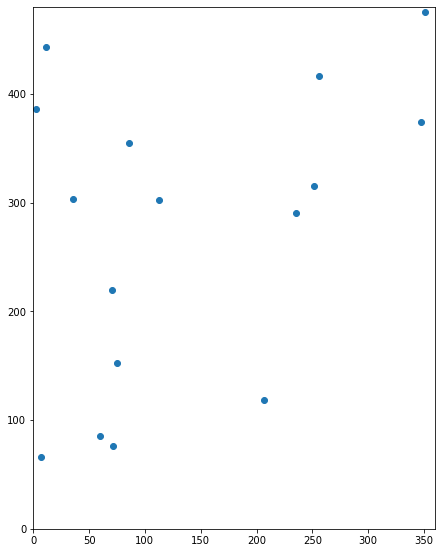

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(36/5, 48/5))

N = 16
np.random.seed(1234567)
x = np.random.random(N)*WIDTH
y = np.random.random(N)*HEIGHT

ax.scatter(x, HEIGHT - y)
ax.set_xlim([0, WIDTH])
ax.set_ylim([0, HEIGHT])

plt.show()

In [10]:
SVG += '  <!-- ! Falling stars 01 -->\n'
SVG += '  <g id="falling-stars01">\n'

maxdur = 5

np.random.seed(12345)
for i in range(N):
    r = 0.75 + np.random.random()*0.75
    h = [0, 220][np.random.randint(2)] + np.random.random()*40 - 20
    SVG += f'    <circle cx="{x[i]:.02f}" r="{r:.02f}" fill="hsl({h:.02f}, 50%, 70%)">\n'
    po = np.random.random()*HEIGHT/2
    pi = HEIGHT + po
    dur = 1 + np.random.random()*(maxdur - 1)
    offset1 = dur*y[i]/HEIGHT
    SVG += f'      <animate attributeName="cy" values="-{po:.02f};{pi:.02f}" dur="{dur:.02f}s" begin="-{offset1:.02f}s" repeatCount="indefinite" />\n'
    offset2 = np.random.random()*4
    SVG += f'      <animate attributeName="opacity" values="1;0.5;0.75;0.25;0.75;0.5;1" dur="5s" begin="-{offset2:.02f}s" repeatCount="indefinite" />\n'
    SVG += f'    </circle>\n'

SVG += '  </g>\n\n'

## Black hole
---

In [11]:
SVG += '  <!-- ! Black hole -->\n'
SVG += f'  <circle cx="250" cy="100" r="30" fill="white" style="filter: url(#BH-filter1);" />\n\n'
SVG += f'  <circle cx="250" cy="100" r="30" fill="url(#BH-grad1)" stroke="white" stroke-width="1" />\n\n'
# SVG += f'  <circle cx="250" cy="100" r="30" fill-opacity="0" stroke="white" stroke-width="4" style="filter: url(#BH-filter1);" />\n\n'

## Falling stars 02
---

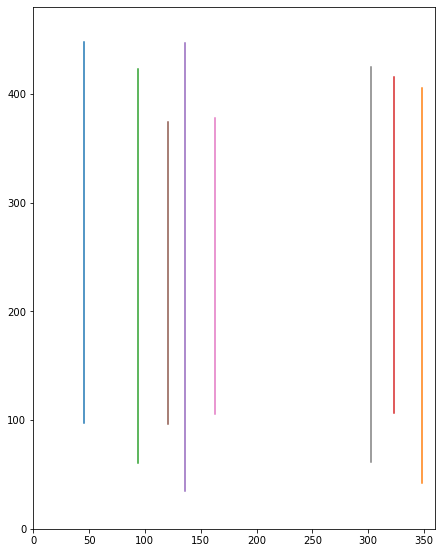

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(36/5, 48/5))

N = 8
ymin = 20
ymax = HEIGHT - ymin

np.random.seed(123456)
x = np.random.random(N)*WIDTH
yo = ymin + np.random.random(N)*(HEIGHT/4 -ymin)
yi = 3*HEIGHT/4 + np.random.random(N)*(HEIGHT/4 -ymin)

for i in range(N):
    ax.plot([x[i]]*2, [HEIGHT - yo[i], HEIGHT - yi[i]])

ax.set_xlim([0, WIDTH])
ax.set_ylim([0, HEIGHT])

plt.show()

In [13]:
SVG += '  <!-- ! Falling stars 02 -->\n'
SVG += '  <g id="falling-stars02" opacity="0.5">\n'

mindur = 2
maxdur = 4

np.random.seed(12345)
for i in range(N):
    length = yi[i] - yo[i]
    space = 3 + np.random.randint(4)
    opacity = 0.25 + np.random.random()*0.5
    SVG += f'    <line x1="{x[i]:.02f}" y1="{yo[i]:.02f}" x2="{x[i]:.02f}" y2="{yi[i]:.02f}" stroke-opacity="{opacity:.02f}" stroke="white" stroke-dasharray="{length:.02f},{space*length:.02f}" stroke-width="1">\n'
    dur = mindur + np.random.random()*(maxdur - mindur)
    offset = np.random.random()*maxdur
    SVG += f'      <animate attributeName="stroke-dashoffset" values="0;-{(space + 1)*length:.02f}" dur="{dur:.02f}s" begin="-{offset:.02f}s" repeatCount="indefinite" />\n'
    SVG += f'    </line>\n'

SVG += '  </g>\n\n'

## Display SVG
---

In [14]:
SVG += f'<text x="{WIDTH - 130}" y="{HEIGHT - 10}" fill="yellow" opacity="0.25">under construction</text>\n'
SVG += '</svg>\n'
# print(SVG)

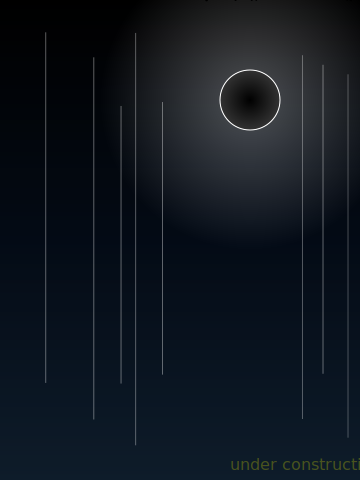

In [15]:
display_svg(SVG)

## Export SVG
---

In [16]:
# export_svg(SVG, 'image')